In [140]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'svg'
%matplotlib inline 
df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190921.txt', parse_dates=[['DATE', 'TIME']])
df['day_of_week'] = df['DATE_TIME'].dt.weekday_name
df.columns

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'day_of_week'],
      dtype='object')

In [2]:
# Rename exit
df.rename(columns ={"EXITS                                                               ":"EXITS"}, inplace=True)

In [5]:
# Get only regular/ working units. The irregulars could be contributing to outliers
df = df[df['DESC'] == 'REGULAR']

In [6]:
df.describe()

,ENTRIES,EXITS
count,2.042350e+05,2.042350e+05
mean,4.215594e+07,3.490572e+07
std,2.157581e+08,1.996471e+08
min,0.000000e+00,0.000000e+00
25%,2.896500e+05,1.292280e+05
50%,2.038905e+06,1.178385e+06
75%,6.615760e+06,4.534095e+06
max,2.129093e+09,2.123772e+09


In [7]:
# Create dif scores for entries / exits
df['ENTRIES_diff'] = df.ENTRIES.diff()
df['EXITS_diff'] = df.EXITS.diff()

In [8]:
# Replace outliers: delete under zero, replace > 20,000 with mean
# GROUPED BY STATION-- so means are coming by station

df['ENTRIES_diff'] = df.groupby(['STATION']).ENTRIES_diff.transform(
    lambda x: np.where((x<0)|(x>20000),x.mask((x<0)|(x>20000)).mean(),x))

In [9]:
df.ENTRIES_diff.describe()

count    204234.000000
mean        188.768041
std         360.117240
min           0.000000
25%          10.000000
50%          84.000000
75%         254.000000
max       19998.000000
Name: ENTRIES_diff, dtype: float64

In [10]:
df['EXITS_diff'] = df.groupby(['STATION']).EXITS_diff.transform(
    lambda x: np.where((x<0)|(x>20000),x.mask((x<0)|(x>20000)).mean(),x))

In [11]:
df.EXITS_diff.describe()

count    204234.000000
mean        153.670505
std         372.759533
min           0.000000
25%           9.000000
50%          60.000000
75%         182.458537
max       19987.000000
Name: EXITS_diff, dtype: float64

In [12]:
df.columns

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DESC', 'ENTRIES', 'EXITS', 'day_of_week', 'ENTRIES_diff',
       'EXITS_diff'],
      dtype='object')

In [13]:
# Create 'traffic_flow'.
df['TRAFFIC_FLOW'] = df['ENTRIES_diff'] + df['EXITS_diff']

In [15]:
df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,day_of_week,ENTRIES_diff,EXITS_diff,TRAFFIC_FLOW
0,2019-09-14 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7198818,2438323,Saturday,NaN,NaN,NaN
1,2019-09-14 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7198834,2438325,Saturday,16.0,2.0,18.0
2,2019-09-14 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7198847,2438354,Saturday,13.0,29.0,42.0
3,2019-09-14 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7198929,2438428,Saturday,82.0,74.0,156.0
4,2019-09-14 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7199125,2438483,Saturday,196.0,55.0,251.0


In [14]:
df['TRAFFIC_FLOW'].describe()

count    204234.000000
mean        342.438546
std         572.652692
min           0.000000
25%          32.000000
50%         193.000000
75%         485.825784
max       38027.000000
Name: TRAFFIC_FLOW, dtype: float64

In [16]:
# set date_time to index
df.set_index('DATE_TIME', inplace = True)

In [17]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,day_of_week,ENTRIES_diff,EXITS_diff,TRAFFIC_FLOW
DATE_TIME,,,,,,,,,,,,,
2019-09-14 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7198818,2438323,Saturday,NaN,NaN,NaN
2019-09-14 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7198834,2438325,Saturday,16.0,2.0,18.0
2019-09-14 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7198847,2438354,Saturday,13.0,29.0,42.0
2019-09-14 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7198929,2438428,Saturday,82.0,74.0,156.0
2019-09-14 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7199125,2438483,Saturday,196.0,55.0,251.0


In [18]:
df['ENTRIES'].describe()

count    2.042350e+05
mean     4.215594e+07
std      2.157581e+08
min      0.000000e+00
25%      2.896500e+05
50%      2.038905e+06
75%      6.615760e+06
max      2.129093e+09
Name: ENTRIES, dtype: float64

In [19]:
# Look at station level
gp_station = df.groupby('STATION')

In [131]:
# summing all entries_diff (which is 4 hour segments of entries), summing (so getting across all dates in data),
# showing highest 5 
gp_station['TRAFFIC_FLOW'].sum().sort_values().tail(5)#(ascending=False)[:5]

STATION
14 ST-UNION SQ     1.317749e+06
23 ST              1.336954e+06
34 ST-HERALD SQ    1.524057e+06
GRD CNTRL-42 ST    1.788344e+06
34 ST-PENN STA     2.016361e+06
Name: TRAFFIC_FLOW, dtype: float64

### Now that we have the top 5 stations, we can focus on which exits/entries within to focus on. We can also do some kind of analysis by day of week, or time of day

In [134]:
# Making a df with top 5 entries
top_entry_stations = df[df['STATION'].isin(['34 ST-PENN STA','GRD CNTRL-42 ST', '34 ST-HERALD SQ', '23 ST', '14 ST-UNION SQ' ])]

In [136]:
top_entry_stations.describe()

,ENTRIES,EXITS
count,1.432100e+04,1.432100e+04
mean,4.989727e+07,5.423042e+07
std,2.283851e+08,2.585205e+08
min,0.000000e+00,0.000000e+00
25%,4.777420e+05,3.898730e+05
50%,3.065873e+06,2.121371e+06
75%,8.670853e+06,6.666645e+06
max,1.999726e+09,2.048716e+09


In [138]:
# Making a df with top 5 entries with nunique
test_top_entry_stations = df[df['STATION'].isin(['34 ST-PENN STA','GRD CNTRL-42 ST', '34 ST-HERALD SQ', '23 ST', '14 ST-UNION SQ' ])].nunique()

In [139]:
teeeop_entry_stations.describe()

count       11.000000
mean      2352.636364
std       5151.966057
min          2.000000
25%          6.000000
50%         17.000000
75%        122.500000
max      12820.000000
dtype: float64

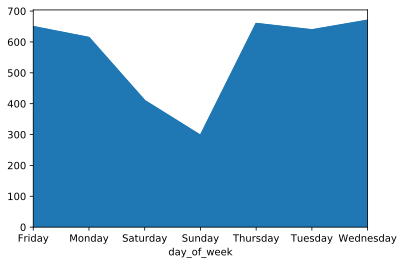

In [128]:
top_entry_stations.groupby('day_of_week')['TRAFFIC_FLOW'].mean().plot(kind='area')

In [25]:
# main df not top stations
# df.groupby('day_of_week').mean()

In [26]:
top_entry_stations.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,day_of_week,ENTRIES_diff,EXITS_diff,TRAFFIC_FLOW
DATE_TIME,,,,,,,,,,,,,
2019-09-14 00:00:00,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,REGULAR,27614743,11470343,Saturday,338.405204,327.412528,665.817732
2019-09-14 04:00:00,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,REGULAR,27615069,11470409,Saturday,326.000000,66.000000,392.000000
2019-09-14 08:00:00,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,REGULAR,27615185,11470511,Saturday,116.000000,102.000000,218.000000
2019-09-14 12:00:00,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,REGULAR,27615767,11470904,Saturday,582.000000,393.000000,975.000000
2019-09-14 16:00:00,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,REGULAR,27616938,11471596,Saturday,1171.000000,692.000000,1863.000000


In [28]:
#top_entry_stations.loc['2019-09-14']['STATION'].min()

# Resample a specific station (can do with group if we want) to do timeseries analysis
## Here resampling daily ('D') and getting mean by DAY, can chain with others such as sum, testing with one station...might need to multi level index station / datetime to do more?

In [77]:
daily_mean_34st = top_entry_stations[top_entry_stations['STATION'] == '34 ST-HERALD SQ'].resample('4H').mean()

Can add sum/max etc on this in addition to mean

In [141]:
daily_mean_34st # ONLY 34 STREET TEST

,ENTRIES,EXITS,ENTRIES_diff,EXITS_diff,TRAFFIC_FLOW
DATE_TIME,,,,,
2019-09-14 00:00:00,8.558734e+07,1.070275e+08,338.405204,327.412528,665.817732
2019-09-14 04:00:00,8.558742e+07,1.070276e+08,94.496489,39.888889,134.385378
2019-09-14 08:00:00,8.558745e+07,1.070276e+08,51.348341,82.333333,133.681674
2019-09-14 12:00:00,8.558761e+07,1.070279e+08,172.311304,293.277778,465.589082
2019-09-14 16:00:00,8.558794e+07,1.070283e+08,359.829822,387.814815,747.644637
2019-09-14 20:00:00,8.558834e+07,1.070287e+08,439.607600,412.351852,851.959452
2019-09-15 00:00:00,8.558860e+07,1.070289e+08,298.940933,211.333333,510.274267
2019-09-15 04:00:00,8.558867e+07,1.070290e+08,81.829822,41.518519,123.348341
2019-09-15 08:00:00,8.558870e+07,1.070290e+08,40.959452,56.981481,97.940933


In [ ]:
# daily_mean_34st_reindex = daily_mean_34st.set_index

In [42]:
daily_mean_top_stations = top_entry_stations.resample('D').mean()

In [57]:
daily_mean_top_stations['TRAFFIC_FLOW']

DATE_TIME
2019-09-14    409.872322
2019-09-15    297.226324
2019-09-16    614.214339
2019-09-17    639.127077
2019-09-18    670.229314
2019-09-19    659.773677
2019-09-20    649.593313
Freq: D, Name: TRAFFIC_FLOW, dtype: float64

### This one might need to be edited a little once we have more than a week. Can select a week at a time

In [156]:
fourH_mean_FLOW_top_stations = top_entry_stations['TRAFFIC_FLOW'].resample('2H').mean()

KeyError: 'TRAFFIC_FLOW'

In [157]:
fourH_mean_FLOW_top_stations

DATE_TIME
2019-09-14 00:00:00     717.342432
2019-09-14 04:00:00      74.288317
2019-09-14 08:00:00     124.231515
2019-09-14 12:00:00     395.747718
2019-09-14 16:00:00     582.474720
2019-09-14 20:00:00     575.320418
2019-09-15 00:00:00     315.267005
2019-09-15 04:00:00      67.955973
2019-09-15 08:00:00      84.526458
2019-09-15 12:00:00     329.024974
2019-09-15 16:00:00     504.427994
2019-09-15 20:00:00     482.155538
2019-09-16 00:00:00     224.010137
2019-09-16 04:00:00      35.690203
2019-09-16 08:00:00     526.855835
2019-09-16 12:00:00     914.182244
2019-09-16 16:00:00     776.019039
2019-09-16 20:00:00    1222.979989
2019-09-17 00:00:00     329.799455
2019-09-17 04:00:00      55.292681
2019-09-17 08:00:00     545.172937
2019-09-17 12:00:00     882.967092
2019-09-17 16:00:00     798.766814
2019-09-17 20:00:00    1256.057615
2019-09-18 00:00:00     332.210352
2019-09-18 04:00:00      39.821706
2019-09-18 08:00:00     539.434595
2019-09-18 12:00:00     972.007170
2019-09-18

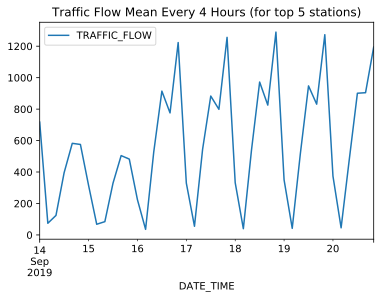

In [158]:
#fourH_mean_FLOW_top_stations.plot(kind='line')
fourH_mean_FLOW_top_stations.plot(kind='line', title='Traffic Flow Mean Every 4 Hours (for top 5 stations)', legend=True)

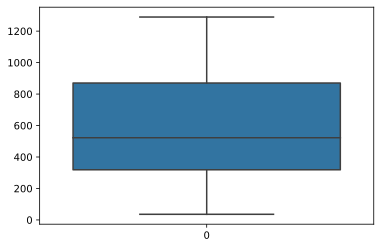

In [147]:
sns.boxplot(data=fourH_mean_FLOW_top_stations)

In [45]:
top_entry_stations_test = top_entry_stations.loc['2019-09-14', 'TRAFFIC_FLOW']

In [46]:
top_entry_stations_test.describe()

count     2034.000000
mean       409.872322
std        685.243450
min          0.000000
25%         62.000000
50%        328.168937
75%        611.817865
max      19064.435438
Name: TRAFFIC_FLOW, dtype: float64

In [116]:
# Testing smoothing via rolling mean
# Apply a rolling mean with a 24 hour window: smoothed
### might not be working because date/time in one??
#smoothed = top_entry_stations['STATION']['2019-09-14'].rolling(window=1).mean()

In [124]:
#fourH_mean_FLOW_top_stations.rolling(window=1).mean().plot(legend=True, kind='line')

In [152]:
df.SCP

0         02-00-00
1         02-00-00
2         02-00-00
3         02-00-00
4         02-00-00
            ...   
204923    00-05-01
204924    00-05-01
204925    00-05-01
204926    00-05-01
204927    00-05-01
Name: SCP, Length: 204928, dtype: object

# Top 20 stations to then reduce based on external info (non-tourist areas etc.)


In [173]:
# groupby station (already made), 'traffic_flow' column sum, get last 20
# sum so we get cumulative sum after whole week (or dataset)
top_20_stations = gp_station['TRAFFIC_FLOW'].sum().sort_values().tail(20)

In [178]:
top_20_stations

STATION
59 ST              6.613582e+05
CHAMBERS ST        7.034479e+05
72 ST              7.099087e+05
FLUSHING-MAIN      7.268315e+05
96 ST              7.327256e+05
47-50 STS ROCK     7.596246e+05
14 ST              7.716227e+05
PATH NEW WTC       7.995908e+05
59 ST COLUMBUS     8.950502e+05
CANAL ST           9.425844e+05
125 ST             9.543053e+05
86 ST              1.129475e+06
42 ST-PORT AUTH    1.153200e+06
FULTON ST          1.181248e+06
TIMES SQ-42 ST     1.254592e+06
14 ST-UNION SQ     1.317749e+06
23 ST              1.336954e+06
34 ST-HERALD SQ    1.524057e+06
GRD CNTRL-42 ST    1.788344e+06
34 ST-PENN STA     2.016361e+06
Name: TRAFFIC_FLOW, dtype: float64

### Picking top 5 from above based on census + gmaps api
#### Once those are selected we can do further analyses
- 34 ST-PENN STA-- delete 
- GRD CNTRL-42 ST-- delete
- 34 ST-HERALD SQ = 10001
- 23rd st zip = 10010
- 14 ST-UNION SQ zip = 10003
- TIMES SQ-42 ST--- delete
- FULTON ST--- zip = 10038
- 42 ST-PORT AUTH--- zip = 10036
- 86 ST--- zip = 10028
- 125 ST--- zip = 10027
- CANAL ST--- zip = 10013
- 59 ST COLUMBUS--- zip = 10023